In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Data Pre-Processing : Cambridge Neighbourhoods

In [17]:
cambridgeHousing = pd.read_csv(r'Decennial_Census_Housing__Tenure____Households__1980_-_2020.csv')
cambridgeHousing = cambridgeHousing[['Neighborhood ','Area','2020 Households','Centerpoint X','Centerpoint Y']]
cambridgeHousing = cambridgeHousing[cambridgeHousing['Neighborhood '] != 'City of Cambridge']
cambridgeHousing.rename(columns = {'Neighborhood ':'Neighborhood'}, inplace = True)

In [18]:
locations = cambridgeHousing.reset_index(drop = True)

# centerpoint_x and y of landfill
landfill_x = -71.08637076560737
landfill_y = 41.923546751190756

# sort by Area in ascending order and reset_index
locations = locations.sort_values(by = 'Area', ascending = True).reset_index(drop = True)
locations

# append a new row: [Landfill, 0, 0, -71.84691680322334, 42.55476989581363]
locations = locations.append({'Neighborhood':'Landfill', 'Area':0, '2020 Households':0, 'Centerpoint X':landfill_x, 'Centerpoint Y':landfill_y}, ignore_index = True)
locations = locations.append({'Neighborhood':'Landfill', 'Area':14, '2020 Households':0, 'Centerpoint X':landfill_x, 'Centerpoint Y':landfill_y}, ignore_index = True)

# sort by area and reset_index
locations = locations.sort_values(by = 'Area', ascending = True).reset_index(drop = True)
locations

/var/folders/cl/5v9cpvt93sjd32_z1w8t6b0c0000gn/T/ipykernel_92285/428088547.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  locations = locations.append({'Neighborhood':'Landfill', 'Area':0, '2020 Households':0, 'Centerpoint X':landfill_x, 'Centerpoint Y':landfill_y}, ignore_index = True)
/var/folders/cl/5v9cpvt93sjd32_z1w8t6b0c0000gn/T/ipykernel_92285/428088547.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  locations = locations.append({'Neighborhood':'Landfill', 'Area':14, '2020 Households':0, 'Centerpoint X':landfill_x, 'Centerpoint Y':landfill_y}, ignore_index = True)


,Neighborhood,Area,2020 Households,Centerpoint X,Centerpoint Y
0,Landfill,0,0,-71.086371,41.923547
1,East Cambridge,1,6953,-71.079048,42.368255
2,MIT,2,806,-71.091376,42.357990
3,Wellington-Harrington,3,2931,-71.093036,42.371032
4,The Port,4,2890,-71.096823,42.365763
5,Cambridgeport,5,5279,-71.107803,42.359193
6,Mid-Cambridge,6,6460,-71.108361,42.372514
7,Riverside,7,4047,-71.114051,42.367360
8,Baldwin,8,1799,-71.115354,42.380727
9,Neighborhood Nine,9,5743,-71.128290,42.385166


In [19]:
# save locations to csv
locations.to_csv('locations.csv', index = False)

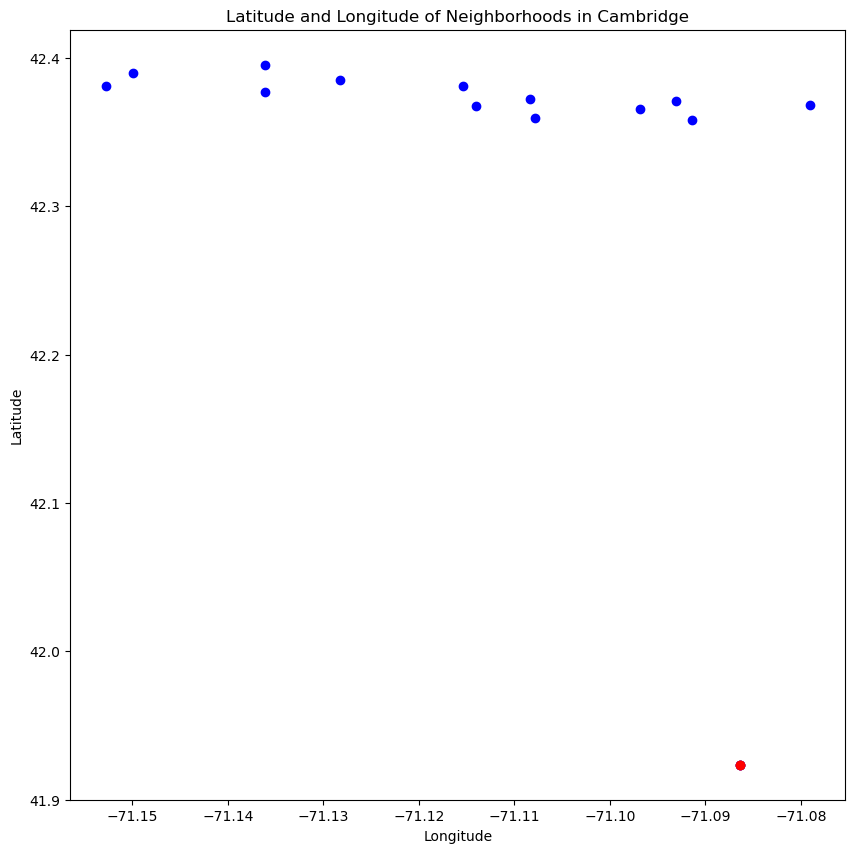

In [20]:
# plot latitude and longitudes of neighborhoods in blue and landfill in red
plt.figure(figsize = (10, 10))
plt.scatter(locations['Centerpoint X'], locations['Centerpoint Y'], c = 'blue')
plt.scatter(locations['Centerpoint X'][locations['Neighborhood'] == 'Landfill'], locations['Centerpoint Y'][locations['Neighborhood'] == 'Landfill'], c = 'red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude and Longitude of Neighborhoods in Cambridge')
plt.show()

# plt.figure(figsize=(10,10))
# plt.scatter(locations['Centerpoint X'],locations['Centerpoint Y'])
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Cambridge Neighborhoods + Landfill')
# plt.show()

Text(0.5, 1.0, 'Neighborhoods in Cambridge')

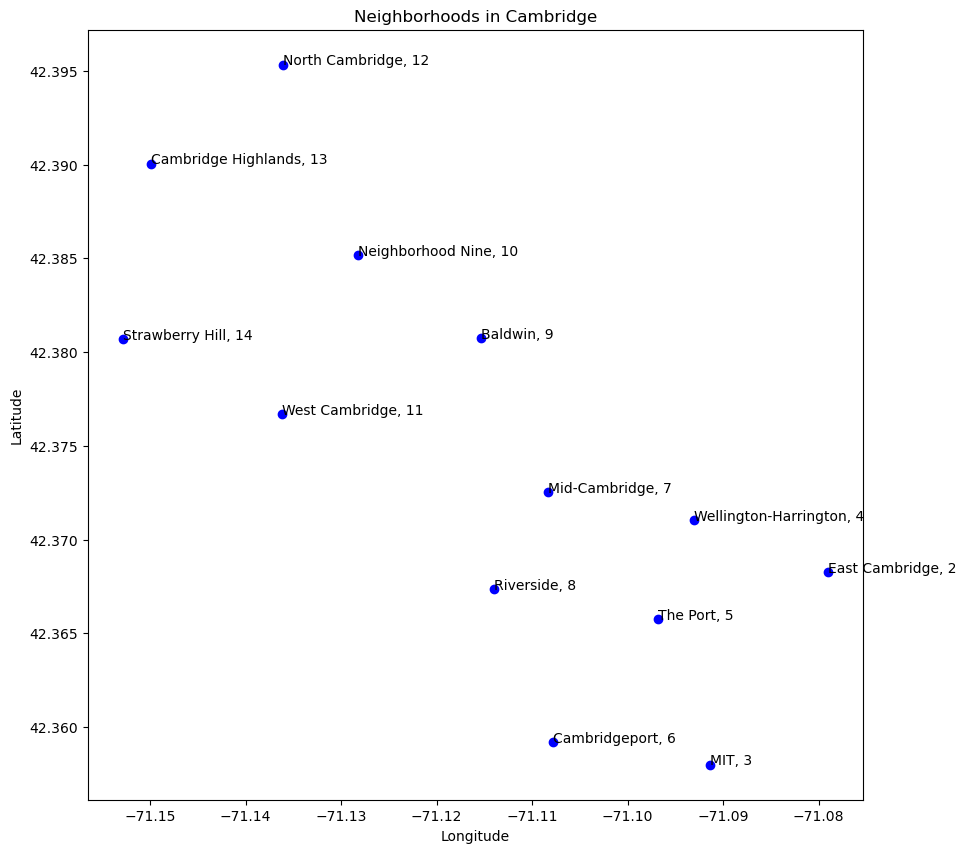

In [21]:
# plot only nodes corresponding to areas 1 to 13
plt.figure(figsize = (10, 10))
plt.scatter(locations['Centerpoint X'][(locations['Area'] != 14) & (locations['Area'] != 0)], locations['Centerpoint Y'][(locations['Area'] != 14) & (locations['Area'] != 0)], c = 'blue')
# add names of neighborhoods and area number for all areas except landfill
for i in range(0, 14):
    if i != 0:
        plt.text(locations['Centerpoint X'][i], locations['Centerpoint Y'][i], locations['Neighborhood'][i] + ', ' + str(locations['Area'][i]+1))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Neighborhoods in Cambridge')



In [22]:
# calculate haversine distances between neighborhoods
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

# create a distance matrix
dist = np.zeros((len(locations),len(locations)))

for i in range(len(locations)):
    for j in range(len(locations)):
        dist[i,j] = haversine(locations['Centerpoint X'][i],locations['Centerpoint Y'][i],locations['Centerpoint X'][j],locations['Centerpoint Y'][j])

# plot distance matrix
dist

array([[ 0.        , 49.45294953, 48.3096582 , 49.76115085, 49.17974699,
        48.47390529, 49.95573723, 49.4025157 , 50.89223513, 51.44584782,
        50.55402119, 52.61884836, 52.13687633, 51.12490081,  0.        ],
       [49.45294953,  0.        ,  1.52596024,  1.18988297,  1.48637276,
         2.56835715,  2.45416827,  2.87732174,  3.28902296,  4.46060311,
         4.78518003,  5.5676178 ,  6.30519246,  6.21595318, 49.45294953],
       [48.3096582 ,  1.52596024,  0.        ,  1.45662021,  0.97331864,
         1.35636707,  2.13430986,  2.13454383,  3.20502802,  4.28103324,
         4.22674279,  5.54201803,  5.98602965,  5.64350079, 48.3096582 ],
       [49.76115085,  1.18988297,  1.45662021,  0.        ,  0.66342084,
         1.7902282 ,  1.269659  ,  1.77406217,  2.12673599,  3.29479828,
         3.5986463 ,  4.44875335,  5.12811924,  5.02713999, 49.76115085],
       [49.17974699,  1.48637276,  0.97331864,  0.66342084,  0.        ,
         1.16077745,  1.20905683,  1.42642464, 

In [23]:
# convert dist to dataframe and save as csv
dist = pd.DataFrame(dist)
dist.to_csv('dist.csv')

In [24]:
pd.DataFrame(dist)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,49.452950,48.309658,49.761151,49.179747,48.473905,49.955737,49.402516,50.892235,51.445848,50.554021,52.618848,52.136876,51.124901,0.000000
1,49.452950,0.000000,1.525960,1.189883,1.486373,2.568357,2.454168,2.877322,3.289023,4.460603,4.785180,5.567618,6.305192,6.215953,49.452950
2,48.309658,1.525960,0.000000,1.456620,0.973319,1.356367,2.134310,2.134544,3.205028,4.281033,4.226743,5.542018,5.986030,5.643501,48.309658
3,49.761151,1.189883,1.456620,0.000000,0.663421,1.790228,1.269659,1.774062,2.126736,3.294798,3.598646,4.448753,5.128119,5.027140,49.761151
4,49.179747,1.486373,0.973319,0.663421,0.000000,1.160777,1.209057,1.426425,2.255169,3.366907,3.453024,4.604139,5.129425,4.890252,49.179747
5,48.473905,2.568357,1.356367,1.790228,1.160777,0.000000,1.481855,1.043139,2.473481,3.342604,3.035675,4.640350,4.872349,4.403107,48.473905
6,49.955737,2.454168,2.134310,1.269659,1.209057,1.481855,0.000000,0.739521,1.078917,2.158479,2.331038,3.407934,3.930809,3.763629,49.955737
7,49.402516,2.877322,2.134544,1.774062,1.426425,1.043139,0.739521,0.000000,1.490190,2.299595,2.092242,3.597272,3.878655,3.512631,49.402516
8,50.892235,3.289023,3.205028,2.126736,2.255169,2.473481,1.078917,1.490190,0.000000,1.171580,1.767777,2.351625,3.021800,3.077907,50.892235
9,51.445848,4.460603,4.281033,3.294798,3.366907,3.342604,2.158479,2.299595,1.171580,0.000000,1.143373,1.297822,1.857021,2.076132,51.445848


## 2) Waste Production Data per Neighbourhood

In [25]:
# append new column to cambridgeHousing dataframe that multiplies 6.9 by the number of households in each neighborhood
locations['Waste Produced: kg per Day'] = locations['2020 Households']*6.9

In [26]:
waste = locations[['Neighborhood','Area','Waste Produced: kg per Day']]
waste

,Neighborhood,Area,Waste Produced: kg per Day
0,Landfill,0,0.0
1,East Cambridge,1,47975.7
2,MIT,2,5561.4
3,Wellington-Harrington,3,20223.9
4,The Port,4,19941.0
5,Cambridgeport,5,36425.1
6,Mid-Cambridge,6,44574.0
7,Riverside,7,27924.3
8,Baldwin,8,12413.1
9,Neighborhood Nine,9,39626.7


In [27]:
# save waste dataframe to csv
waste.to_csv('waste_per_day.csv', index = False)

## 3) Emissions Data per Neighbourhood Pair (i,j)

In [32]:
unit_emissions = 2.5 # kg-eCO2 per km
emissions = 4*dist*unit_emissions
pd.DataFrame(emissions)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,494.529495,483.096582,497.611508,491.797470,484.739053,499.557372,494.025157,508.922351,514.458478,505.540212,526.188484,521.368763,511.249008,0.000000
1,494.529495,0.000000,15.259602,11.898830,14.863728,25.683571,24.541683,28.773217,32.890230,44.606031,47.851800,55.676178,63.051925,62.159532,494.529495
2,483.096582,15.259602,0.000000,14.566202,9.733186,13.563671,21.343099,21.345438,32.050280,42.810332,42.267428,55.420180,59.860297,56.435008,483.096582
3,497.611508,11.898830,14.566202,0.000000,6.634208,17.902282,12.696590,17.740622,21.267360,32.947983,35.986463,44.487533,51.281192,50.271400,497.611508
4,491.797470,14.863728,9.733186,6.634208,0.000000,11.607775,12.090568,14.264246,22.551686,33.669071,34.530242,46.041395,51.294247,48.902520,491.797470
5,484.739053,25.683571,13.563671,17.902282,11.607775,0.000000,14.818550,10.431387,24.734814,33.426038,30.356749,46.403500,48.723491,44.031066,484.739053
6,499.557372,24.541683,21.343099,12.696590,12.090568,14.818550,0.000000,7.395211,10.789168,21.584790,23.310382,34.079337,39.308086,37.636292,499.557372
7,494.025157,28.773217,21.345438,17.740622,14.264246,10.431387,7.395211,0.000000,14.901901,22.995946,20.922424,35.972720,38.786549,35.126311,494.025157
8,508.922351,32.890230,32.050280,21.267360,22.551686,24.734814,10.789168,14.901901,0.000000,11.715802,17.677771,23.516250,30.218000,30.779071,508.922351
9,514.458478,44.606031,42.810332,32.947983,33.669071,33.426038,21.584790,22.995946,11.715802,0.000000,11.433727,12.978224,18.570209,20.761320,514.458478


In [29]:
# convert emissions to a dataframe and save to csv
emissions = pd.DataFrame(emissions)
emissions.to_csv('emissions.csv')

## 4) Cost Data per Neighbourhood Pair (i,j)

In [30]:
unit_cost = 1.25 # $ per km to operate a refuse vehicle
cost = dist*unit_cost
pd.DataFrame(cost)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,61.816187,60.387073,62.201439,61.474684,60.592382,62.444672,61.753145,63.615294,64.307310,63.192526,65.773560,65.171095,63.906126,0.000000
1,61.816187,0.000000,1.907450,1.487354,1.857966,3.210446,3.067710,3.596652,4.111279,5.575754,5.981475,6.959522,7.881491,7.769941,61.816187
2,60.387073,1.907450,0.000000,1.820775,1.216648,1.695459,2.667887,2.668180,4.006285,5.351292,5.283428,6.927523,7.482537,7.054376,60.387073
3,62.201439,1.487354,1.820775,0.000000,0.829276,2.237785,1.587074,2.217578,2.658420,4.118498,4.498308,5.560942,6.410149,6.283925,62.201439
4,61.474684,1.857966,1.216648,0.829276,0.000000,1.450972,1.511321,1.783031,2.818961,4.208634,4.316280,5.755174,6.411781,6.112815,61.474684
5,60.592382,3.210446,1.695459,2.237785,1.450972,0.000000,1.852319,1.303923,3.091852,4.178255,3.794594,5.800438,6.090436,5.503883,60.592382
6,62.444672,3.067710,2.667887,1.587074,1.511321,1.852319,0.000000,0.924401,1.348646,2.698099,2.913798,4.259917,4.913511,4.704537,62.444672
7,61.753145,3.596652,2.668180,2.217578,1.783031,1.303923,0.924401,0.000000,1.862738,2.874493,2.615303,4.496590,4.848319,4.390789,61.753145
8,63.615294,4.111279,4.006285,2.658420,2.818961,3.091852,1.348646,1.862738,0.000000,1.464475,2.209721,2.939531,3.777250,3.847384,63.615294
9,64.307310,5.575754,5.351292,4.118498,4.208634,4.178255,2.698099,2.874493,1.464475,0.000000,1.429216,1.622278,2.321276,2.595165,64.307310


In [31]:
# convert cost matrix to a dataframe and then save to csv
cost_df = pd.DataFrame(cost)
cost_df.to_csv('cost.csv')

## 5) Possible Routes for all 13 Neighbourhoods

In [67]:
from itertools import permutations

In [73]:
# # DO NOT UNCOMMENT THIS LINE OF CODE - TAKES TOO LONG TO RUN, OVER 10^10 POSSIBLE ROUTES
# # generate permutations for the visiting order of 13 neighbourhoods: 1 to 13
# nodes = [i for i in range(1, len(cambridgeHousing)+1)]
# routes = []
# n_permutations = 0

# for i in range(1, len(nodes)+1):
#     all_routes_i_nodes_visited = list(permutations(nodes, r = i))
#     n_permutations += len(all_routes_i_nodes_visited)
    
#     for j in range(0, len(all_routes_i_nodes_visited)):
#         route_i = list(all_routes_i_nodes_visited[j])
#         route_i.append(0)
#         route_i.insert(0, 0)
#         routes.append(route_i)

# nodes
        

**Note**: With 13 nodes, the number of possible route permutations is already in the order for 10 ${^9}$ or possibly more, which takes too long to compute. Therefore, we will impose an additional constraint that limits how many neighbourhoods each refuse vehicle can visit. For example, we could say that each refuse vehicle can only visit 7 neighbourhoods at most. This reduces the number of possible route permutations. With this limit, the number of possible route permutations is reduced from 10 ${^9}$ to 10 ${^7}$

In [74]:
nodes = [i for i in range(1, len(cambridgeHousing)+1)]
routes = []
n_permutations = 0
lim_neighbourhoods_visited = 7

for i in range(1, lim_neighbourhoods_visited+1):
    all_routes_i_nodes_visited = list(permutations(nodes, r = i))
    n_permutations += len(all_routes_i_nodes_visited)
    
    for j in range(0, len(all_routes_i_nodes_visited)):
        route_i = list(all_routes_i_nodes_visited[j])
        route_i.append(0)
        route_i.insert(0, 0)
        routes.append(route_i)

In [79]:
print("The number of routes is", n_permutations)
print("The first possible route is", routes[0])
print("The last possible route is", routes[-1])
print("Another random possible route is", routes[9000000])

The number of routes is 10057645
The first possible route is [0, 1, 0]
The last possible route is [0, 13, 12, 11, 10, 9, 8, 7, 0]
Another random possible route is [0, 12, 5, 13, 2, 7, 6, 11, 0]
